In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c house-prices-advanced-regression-techniques
! chmod 600 /content/kaggle.json

Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           9013  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5520  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1990  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2381  
promptcloud/careerbuilder-job-listing-2020

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)

In [ ]:
#importing data from csv file using pandas
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


.drop takes 2 params

1) labels               	
Index or column labels to drop.
single label or list-like	Required

2) axis   	
Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).	{0 or ‘index’, 1 or ‘columns’}
Default Value: 0	Required

In [ ]:
#lets create heatmap first of all lest see on which feature SalePrice is dependent

corr = train.drop('Id',1).corr().sort_values(by='SalePrice',ascending=False).round(2)
print(corr['SalePrice'])

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64


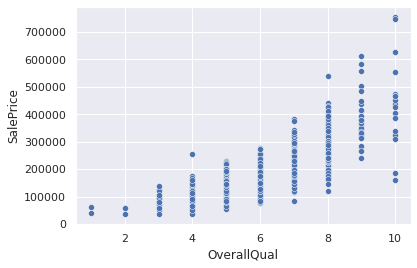

In [ ]:
#lets create scatterplot of GrLivArea and SalePrice
sns.scatterplot(x='OverallQual',y='SalePrice',data=train)

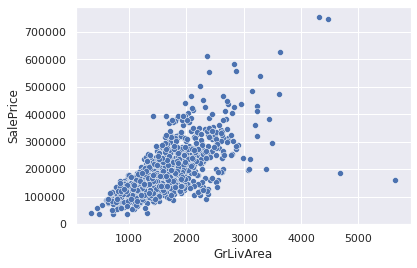

In [ ]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [ ]:
#as per above plot we can see there are two outliers which can affect on out model,lets remove those outliers
train=train.drop(train.loc[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,0)
train.reset_index(drop=True, inplace=True)

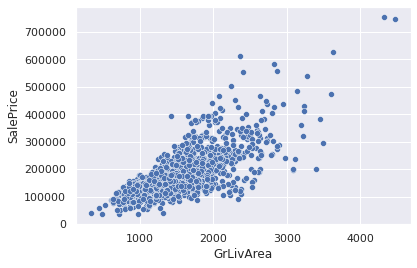

In [ ]:
#let we how its look after removing outliers
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

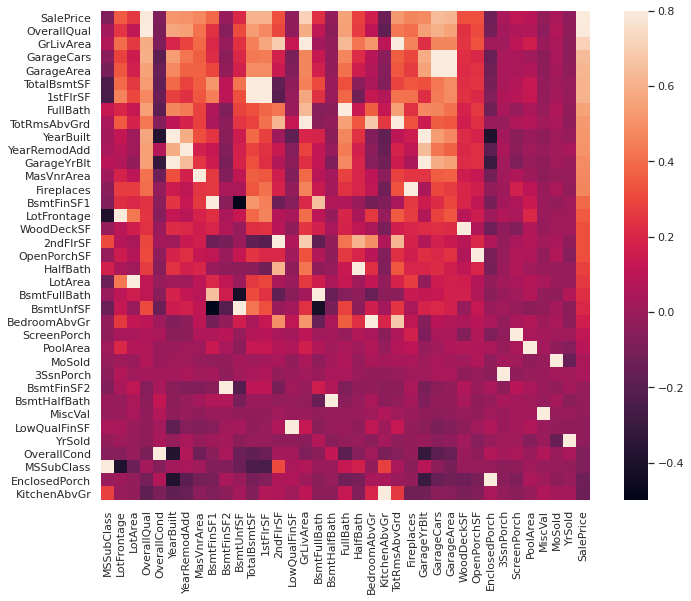

In [ ]:
#here we can see SalePrice mostly dependent on this features OverallQual,GrLivArea,TotalBsmtSF,GarageCars,1stFlrSF,GarageArea 
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

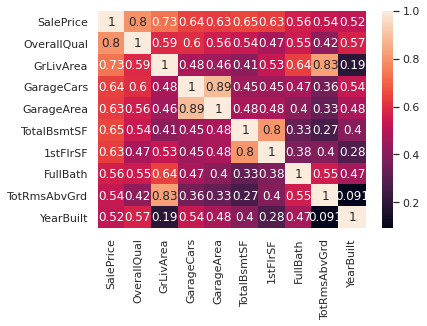

In [ ]:
#now lets create heatmap for top 10 correlated features
cols = corr['SalePrice'].head(10).index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
"""cols = corr['SalePrice'].head(10).index
cm = np.corrcoef(train[cols].values.T)
cm"""

"cols = corr['SalePrice'].head(10).index\ncm = np.corrcoef(train[cols].values.T)\ncm"

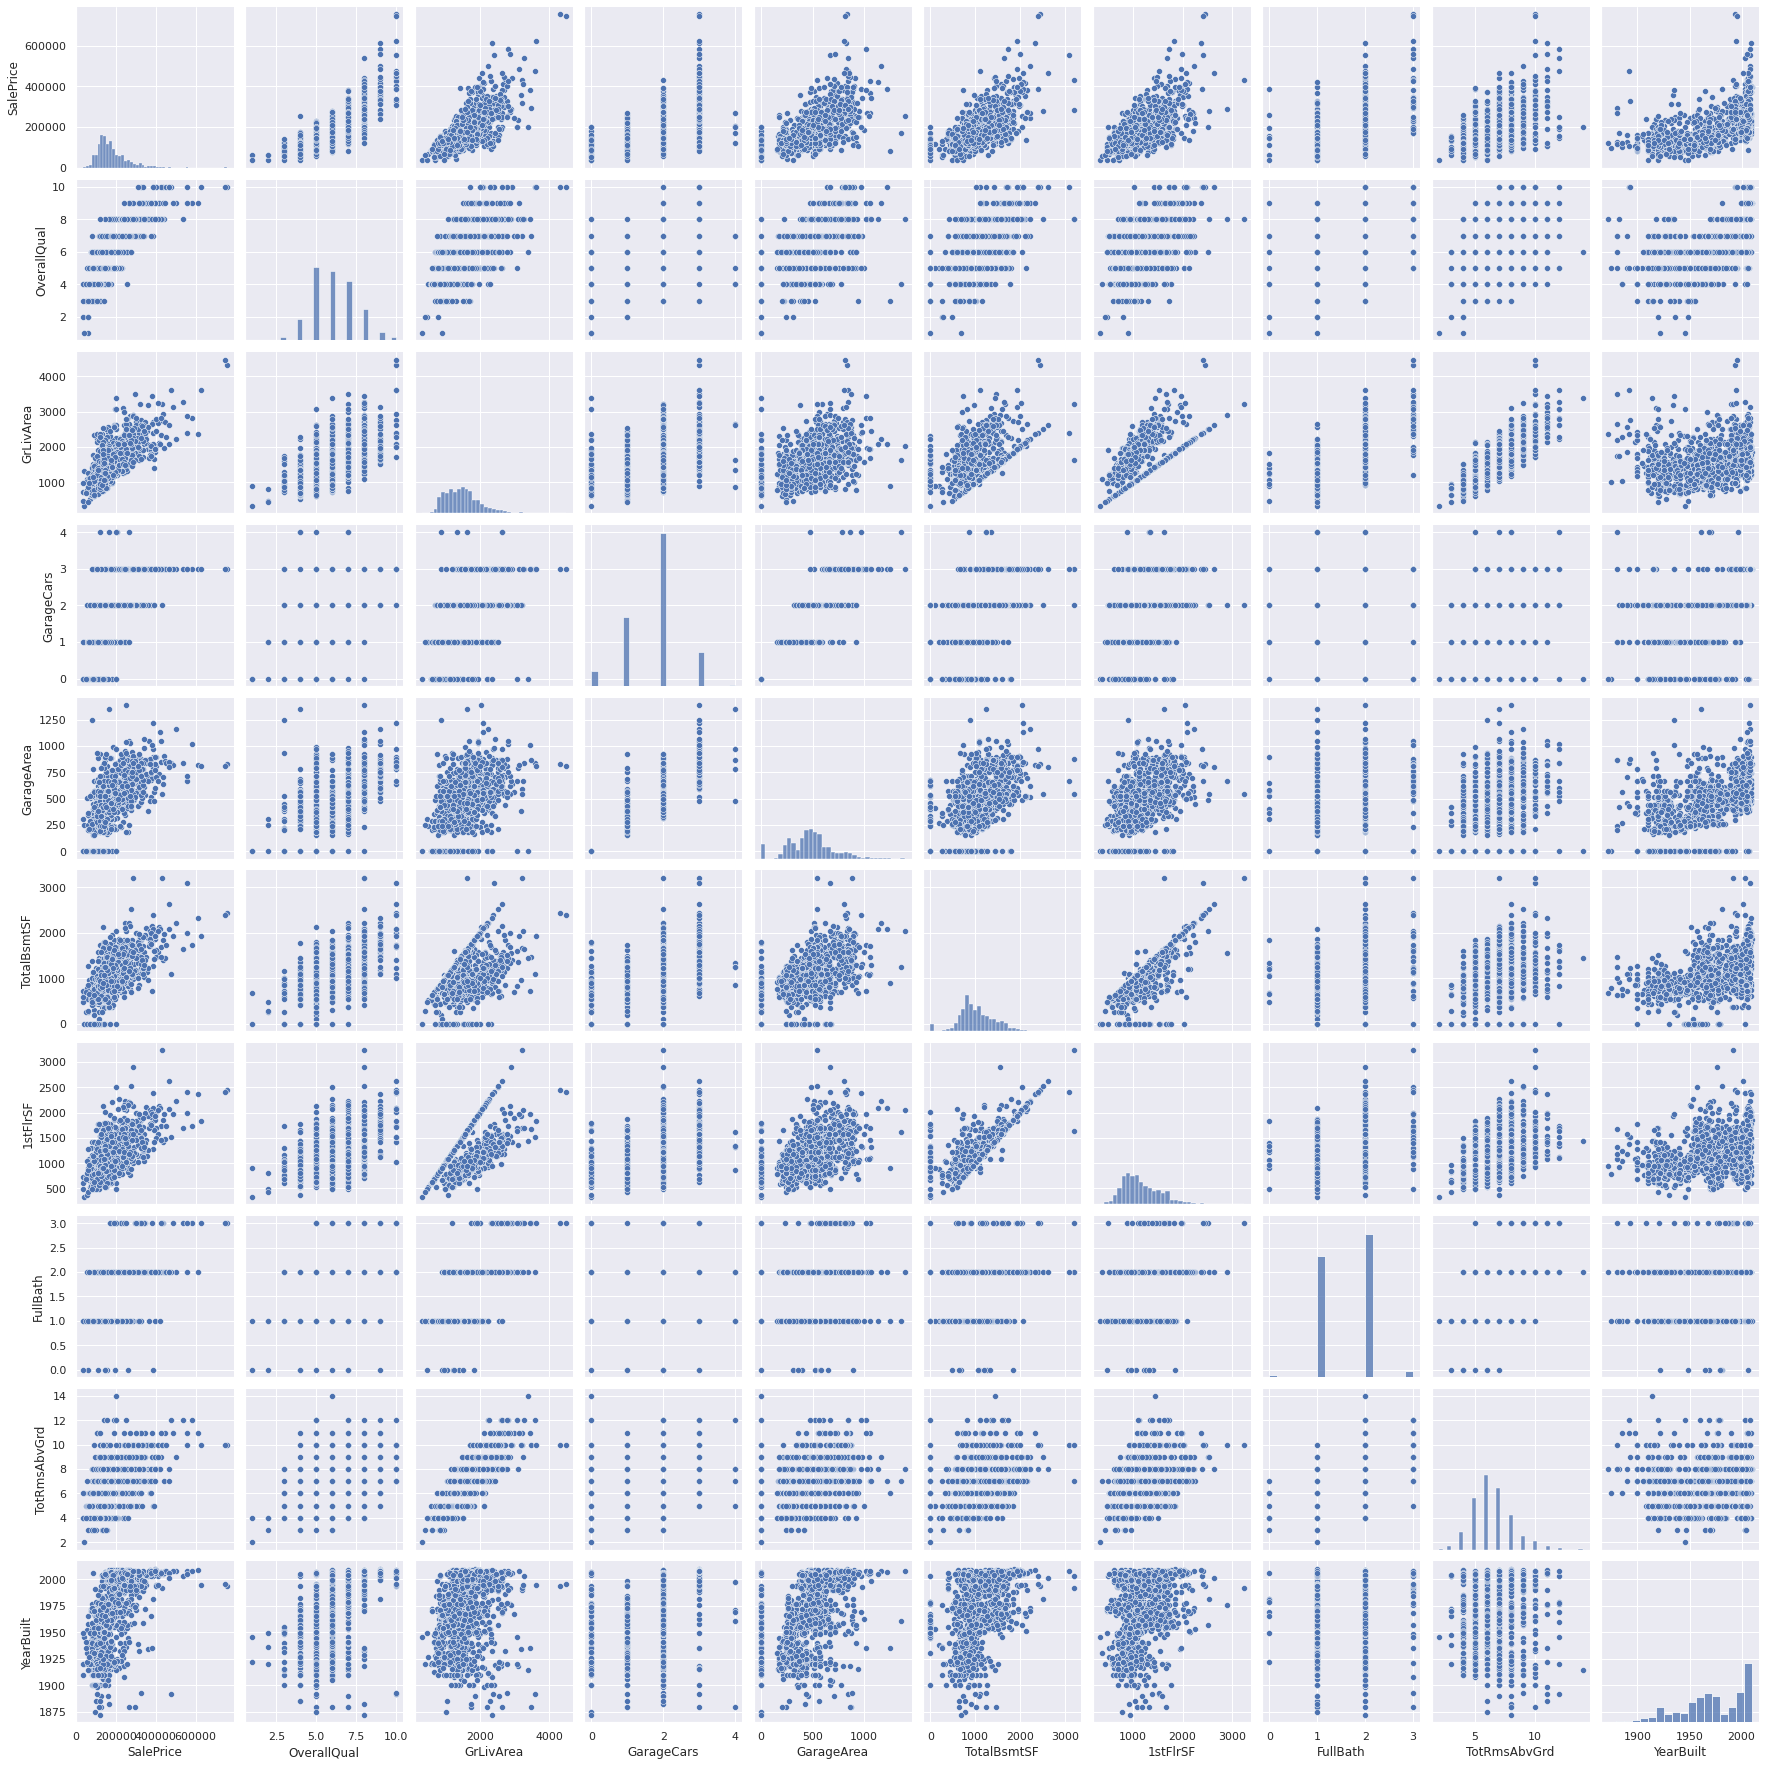

In [ ]:
#lets see relation of 10 feature with SalePrice through Pairplot
sns.pairplot(train[corr['SalePrice'].head(10).index])

In [ ]:
#lets store number of test and train rows
trainrow=train.shape[0]
testrow=test.shape[0]

In [ ]:
#copying id data
testids=test['Id'].copy()

In [ ]:
#copying sales priece
y_train=train['SalePrice'].copy()

In [ ]:
#combining train and test data
data=pd.concat((train,test)).reset_index(drop=True)
data=data.drop('SalePrice',1)

In [ ]:
#dropping id columns
data=data.drop('Id',axis=1)

In [ ]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
#checking missing data
missing = data.isnull().sum().sort_values(ascending=False)
missing

PoolQC         2908
MiscFeature    2812
Alley          2719
Fence          2346
FireplaceQu    1420
               ... 
1stFlrSF          0
CentralAir        0
Heating           0
Foundation        0
MSSubClass        0
Length: 79, dtype: int64

In [ ]:
missing = missing.drop(missing[missing==0].index)
missing

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [ ]:
# fillna
for cols in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageCond","GarageQual","GarageFinish"]:
    data[cols].fillna("NA",inplace=True)

In [ ]:
for bsmt in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]:
    data[bsmt].fillna("NA",inplace=True)

In [ ]:
for gar in ['GarageYrBlt','GarageType','GarageCars', 'GarageArea']:
    data[gar].fillna(0,inplace=True)

In [ ]:
#BsmtFinSF1,BsmtFinSF2 
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)

In [ ]:
#MasVnrType,MasVnrArea
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [ ]:
#MSZoning 
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].dropna().sort_values().index[0])

In [ ]:
#Utilities
data['Utilities']=data['Utilities'].fillna(data['Utilities'].dropna().sort_values().index[0])

In [ ]:
#BsmtFullBath
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)

#Functional
data['Functional']=data['Functional'].fillna(data['Functional'].dropna().sort_values().index[0])

#BsmtHalfBath
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)

#BsmtUnfSF
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)

In [ ]:
#Exterior2nd
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')

#Exterior1st
data['Exterior1st']=data['Exterior1st'].fillna('NA')

In [ ]:
#TotalBsmtSF
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)

In [ ]:
#SaleType
data['SaleType']=data['SaleType'].fillna(data['SaleType'].dropna().sort_values().index[0])

In [ ]:
#Electrical
data['Electrical']=data['Electrical'].fillna(data['Electrical'].dropna().sort_values().index[0])

In [ ]:
#KitchenQual
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].dropna().sort_values().index[0])

In [ ]:
#lets check any missing remain
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

LotFrontage    486
dtype: int64

In [ ]:
#LotFrontage: all house have linear connected feet so putting most mean value
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].dropna().mean())

In [ ]:
#lets check any missing remain
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [ ]:
#as we know some feature are highly co-related with SalePrice so lets create some feature using these features
data['GrLivArea_2']=data['GrLivArea']**2
data['GrLivArea_3']=data['GrLivArea']**3
data['GrLivArea_4']=data['GrLivArea']**4

data['TotalBsmtSF_2']=data['TotalBsmtSF']**2
data['TotalBsmtSF_3']=data['TotalBsmtSF']**3
data['TotalBsmtSF_4']=data['TotalBsmtSF']**4

data['GarageCars_2']=data['GarageCars']**2
data['GarageCars_3']=data['GarageCars']**3
data['GarageCars_4']=data['GarageCars']**4

data['1stFlrSF_2']=data['1stFlrSF']**2
data['1stFlrSF_3']=data['1stFlrSF']**3
data['1stFlrSF_4']=data['1stFlrSF']**4

data['GarageArea_2']=data['GarageArea']**2
data['GarageArea_3']=data['GarageArea']**3
data['GarageArea_4']=data['GarageArea']**4

In [ ]:
#lets add 1stFlrSF and 2ndFlrSF and create new feature floorfeet
data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(['1stFlrSF','2ndFlrSF'],1)

In [ ]:
#MSSubClass,MSZoning
data=pd.get_dummies(data=data,columns=['MSSubClass'],prefix='MSSubClass')
data=pd.get_dummies(data=data,columns=['MSZoning'],prefix='MSZoning')
data.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,...,SaleType,SaleCondition,GrLivArea_2,GrLivArea_3,GrLivArea_4,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,GarageCars_2,GarageCars_3,GarageCars_4,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,GarageArea_2,GarageArea_3,GarageArea_4,Floorfeet,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_811,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,...,WD,Normal,2924100,5000211000,8550360810000,732736.0,6.272220e+08,5.369020e+11,4.0,8.0,16.0,732736,627222016,536902045696,300304.0,164566592.0,9.018249e+10,1710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,...,WD,Normal,1592644,2009916728,2536514910736,1592644.0,2.009917e+09,2.536515e+12,4.0,8.0,16.0,1592644,2009916728,2536514910736,211600.0,97336000.0,4.477456e+10,1262,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,...,WD,Normal,3189796,5696975656,10174798521616,846400.0,7.786880e+08,7.163930e+11,4.0,8.0,16.0,846400,778688000,716392960000,369664.0,224755712.0,1.366515e+11,1786,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,...,WD,Abnorml,2948089,5061868813,8691228751921,571536.0,4.320812e+08,3.266534e+11,9.0,27.0,81.0,923521,887503681,852891037441,412164.0,264609288.0,1.698792e+11,1717,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,...,WD,Normal,4831204,10618986392,23340532089616,1311025.0,1.501124e+09,1.718787e+12,9.0,27.0,81.0,1311025,1501123625,1718786550625,698896.0,584277056.0,4.884556e+11,2198,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
data=pd.get_dummies(data=data,columns=['Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'])
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#OverallQual
data=pd.get_dummies(data=data,columns=['OverallQual'],prefix='OverallQual')
#OverallCond
data=pd.get_dummies(data=data,columns=['OverallCond'],prefix='OverallCond')

In [ ]:
#we have remodel year data so lest one new feature home is remodeled or not
data['Remodeled']=0
data.loc[data['YearBuilt']!=data['YearRemodAdd'],'Remodeled']=1
data=data.drop('YearRemodAdd',1)
data=pd.get_dummies(data=data,columns=['Remodeled'])

In [ ]:
#creating dummies fo all categorical data
data=pd.get_dummies(data=data,columns=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'])

In [ ]:
#lets add all bath in one feature
data['Bath']=data['BsmtFullBath']+data['BsmtHalfBath']*.5+data['FullBath']+data['HalfBath']*.5
data=data.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],1)

In [ ]:
#dummies
data=pd.get_dummies(data=data,columns=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'])

In [ ]:
#here we  has one more outliers lets replace it with 0
data.loc[data['GarageYrBlt']==2207.,'GarageYrBlt']=0

# Feature Scaling

In [ ]:
#lets import StandardScaler from sklearn for feature scalling
from sklearn.preprocessing import StandardScaler

In [ ]:
#lets split data using trainrow data and scale data
x_train=data.iloc[:trainrow]
x_test=data.iloc[trainrow:]
scaler=StandardScaler()
scaler=scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Regression - 
### 1) Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
reg_liner=LinearRegression()
reg_liner.fit(x_train_scaled,y_train)
reg_liner.score(x_train_scaled,y_train)

0.9561679181332732

### 2) XGBoost

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(x_train_scaled, y_train)
print(my_model.score(x_train_scaled,y_train))

[14:16:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

### 3) Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(criterion='mse',max_depth=5)
tree.fit(x_train_scaled,y_train)
print(tree.score(x_train_scaled,y_train))

### 4) Support Vector Regression

In [ ]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train_scaled,y_train)
print(svm_model.score(x_train_scaled,y_train))

### 5) Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
gnb=GaussianNB()
mnb=MultinomialNB()
gnb.fit(x_train_scaled,y_train)
mnb.fit(x_train,y_train)
print(gnb.score(x_train_scaled,y_train))
print(mnb.score(x_train,y_train))

### 6) Random Forest

In [ ]:
#7.Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=1000)
rfr.fit(x_train_scaled,y_train)
print(rfr.score(x_train_scaled,y_train))

In [ ]:
predictions = xgb_submission_model.predict(test_data)

submission = pd.DataFrame(columns=['Id', 'SalePrice'])
submission['Id'] = test_df['Id']
submission['SalePrice'] = predictions
submission.to_csv('submission_3.csv', index=False)
print("submission worked")